# ky - Time Series Visualizations

A simple walkthrough on how to use Python to visualize time series data.

Using pandas_datareader library, we can easily import finance data for visualization exercise

In [14]:
import matplotlib.pyplot as plt

In [13]:
from pandas_datareader import data as web

from datetime import datetime

start = datetime(2010, 1, 1)
end = datetime(2015, 12, 31)

appl = web.get_data_yahoo('AAPL', start=start, end=end)
appl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.439648
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.539882
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.551187
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.446983
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.435065


Let's plot a simple line chart of closing price against time.

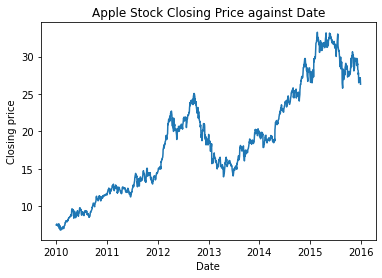

In [30]:
plt.plot(appl.Close)
plt.ylabel('Closing price')
plt.xlabel('Date')
plt.title('Apple Stock Closing Price against Date')
plt.show()

Let's plot a multivariate time series line chart consisting of two stock prices, Apple and Google

In [40]:
msft = web.get_data_yahoo("MSFT", start=start, end=end)
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.739305
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.105360
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.113148
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.965164
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.715933


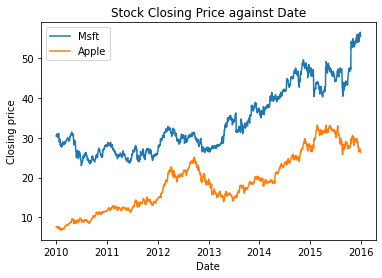

In [42]:
plt.plot(msft.Close, label="Msft")
plt.plot(appl.Close, label="Apple")
plt.ylabel('Closing price')
plt.xlabel('Date')
plt.title('Stock Closing Price against Date')
plt.legend()
plt.show()

Another way is to used plot() method on DataFrame. Below we demonstrate how to perform lag differencing and plotting it using Matplotlib.

In [98]:
import io
import requests
import pandas as pd

# let's specify the url link
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url)
# download = requests.get(url).content

# # Let's read and turn the object into a Pandas DataFrame
# df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Let's print parts of the data
print(df.head())

# Actually, the data were collected starting in 2000,
# but the data do not represent it well. So let us 
# make some modifications
df.Month = ['200' + row for row in df.Month]
# df = pd.DataFrame({"Month": ["a", "b", "a"]})
    
print(df.head())
    

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
     Month  Sales
0  2001-01  266.0
1  2001-02  145.9
2  2001-03  183.1
3  2001-04  119.3
4  2001-05  180.3


Well, it is kinda difficult to work with a time series data without time indexing it. So let's try to set the time index

In [126]:
from datetime import datetime

df_indexed = df.set_index("Month")
df_indexed.index = pd.to_datetime(df_indexed.index, format="%Y-%m")

df_indexed.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


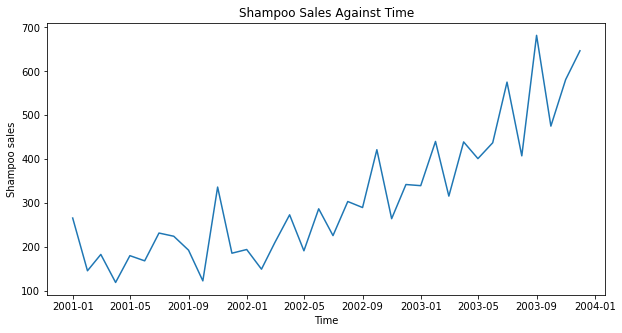

In [139]:
plt.figure(figsize=(10,5))
plt.ylabel("Shampoo sales")
plt.xlabel("Time")
plt.title("Shampoo Sales Against Time")
plt.plot(df_indexed.Sales)

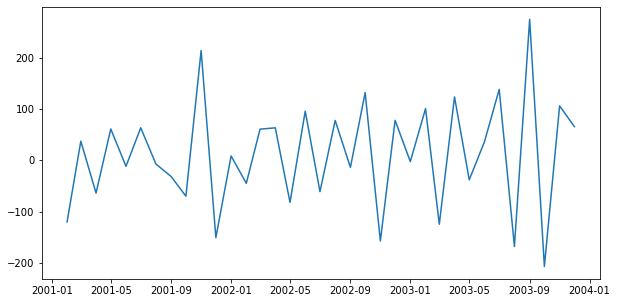

In [140]:
# let's do 1-order differencing and plot it out
df_diff1 = df_indexed.diff()
plt.figure(figsize=(10,5))
plt.plot(df_diff1)

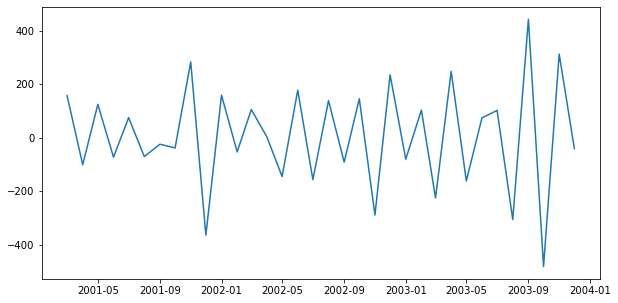

In [141]:
# let's difference it a second time
df_diff2 = df_diff1.diff()
plt.figure(figsize=(10, 5))
plt.plot(df_diff2)

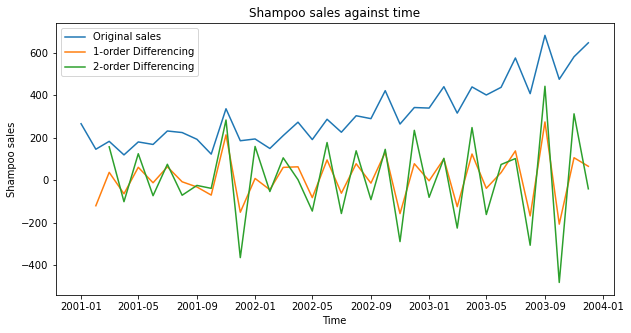

In [142]:
# let's put them all together in a same graph
plt.figure(figsize=(10, 5))
plt.ylabel("Shampoo sales")
plt.xlabel("Time")
plt.title("Shampoo sales against time")
plt.plot(df_indexed, label='Original sales')
plt.plot(df_diff1, label='1-order Differencing')
plt.plot(df_diff2, label='2-order Differencing')
plt.legend()
plt.show()